In [148]:
import pyart
#imports
import os # Code for dealing with the file system
import numpy as np
from matplotlib import pyplot as plt
from dask.distributed import Client, progress, metrics, LocalCluster
from netCDF4 import num2date
import glob
from collections import defaultdict
import matplotlib.dates as mdates
import pytz
import cartopy
from datetime import timedelta

%matplotlib inline


In [2]:
ex_dir = '/lustre/or-hydra/cades-arm/proj-shared/scanning_collab/'
files_I5_ppi = [f for f in glob.glob(ex_dir + "**/sgpxsaprppiI5*.iris", recursive=True)]
files_I6_ppi = [f for f in glob.glob(ex_dir + "**/sgpxsaprppiI6*.iris", recursive=True)]
files_I4_ppi = [f for f in glob.glob(ex_dir + "**/sgpxsaprppiI4*.iris", recursive=True)]

files_I4_ppi.sort()
files_I5_ppi.sort()
files_I6_ppi.sort()

In [14]:
ex_dir = '/lustre/or-hydra/cades-arm/proj-shared/scanning_collab/processed/'
files_proc = [f for f in glob.glob(ex_dir + "**/*.nc", recursive=True)]


In [72]:
def analyze_radar_ecatch(filename):
    try:
        this_dataset = pyart.io.read(filename)
        fp = 1
        cat_dict = {}
        for pair_str in this_dataset.fields['gate_id']['notes'].split(','):
            cat_dict.update(
                {pair_str.split(':')[1]:int(pair_str.split(':')[0])})
            
        time_start = num2date(this_dataset.time['data'][0], this_dataset.time['units'])
        tgates = float(this_dataset.ngates*this_dataset.nrays)
        zdat = this_dataset.fields['gate_id']['data']
        fp = 2
        rain = float(len(np.where(zdat == cat_dict['rain'])[0]))/tgates
        snow = float(len(np.where(zdat == cat_dict['snow'])[0]))/tgates
        rv = (time_start, rain, snow, this_dataset.metadata['sigmet_task_name'] )
        del this_dataset
    except Exception as e:
        rv = 'Error ' + str(e)
    return rv

In [73]:

client = Client('arm-jupyter.ornl.gov:5555')

In [74]:
client

Client Scheduler: tcp://arm-jupyter.ornl.gov:5555 Dashboard: http://arm-jupyter.ornl.gov:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [75]:
future = client.map(analyze_radar_ecatch, files_proc)
progress(future)

VBox()

In [76]:
future[0]

<Future: status: finished, type: tuple, key: analyze_radar_ecatch-e428aa6da93207b5d4a9a31ab2934311>

In [37]:
#client.gather(future[0])

"Error name 'time_at_start' is not defined"

In [71]:
client.restart()

Client Scheduler: tcp://arm-jupyter.ornl.gov:5555 Dashboard: http://arm-jupyter.ornl.gov:8787/status,Cluster Workers: 30 Cores: 180 Memory: 1.28 TB


In [77]:
my_data = client.gather(future)
d = defaultdict(list)
for x in my_data:
   d[type(x)].append(x)


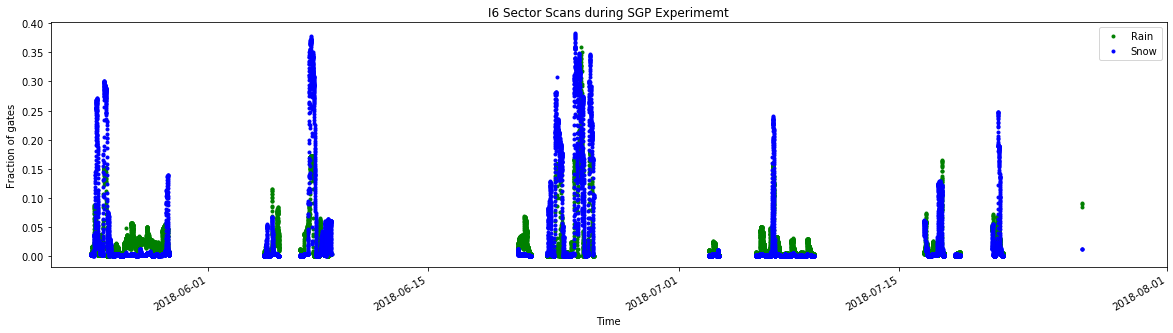

In [64]:
times = np.array([tpl[0] for tpl in d[tuple]])
sme = np.argsort(times)


rain = np.array([tpl[1] for tpl in d[tuple]])
snow = np.array([tpl[2] for tpl in d[tuple]])
my_fig = plt.figure(figsize=[20,5])
plt.plot(times[sme], rain[sme], '.g', label='Rain')
plt.plot(times[sme], snow[sme], '.b', label='Snow')
#plt.plot(times[sme], z40[sme], '-r', label='40dBz')

axme = plt.gca()
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
my_fig.autofmt_xdate()
plt.xlim(['2018-05-22', '2018-08-01'])
plt.ylabel('Fraction of gates')
plt.xlabel('Time')
plt.title('I6 Sector Scans during SGP Experimemt')
plt.legend()
plt.savefig('/home/scollis/cmaci5sec.png')

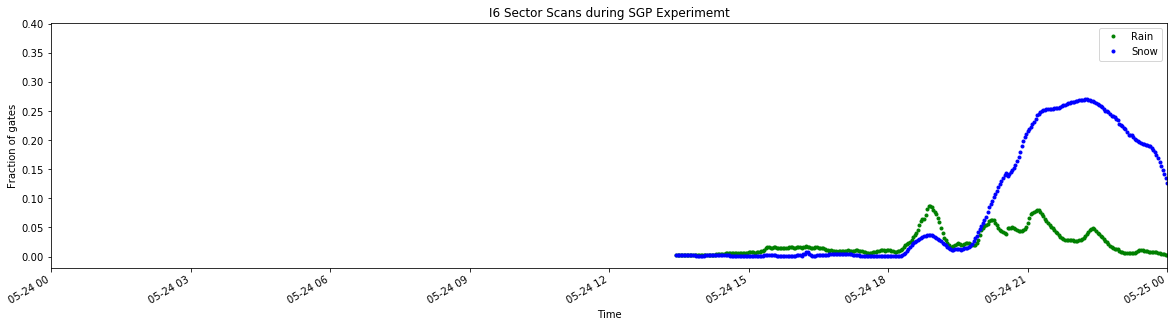

In [116]:
times = np.array([tpl[0] for tpl in d[tuple]])
sme = np.argsort(times)


rain = np.array([tpl[1] for tpl in d[tuple]])
snow = np.array([tpl[2] for tpl in d[tuple]])
experiment = np.array([tpl[3] for tpl in d[tuple]])



my_fig = plt.figure(figsize=[20,5])
plt.plot(times[sme], rain[sme], '.g', label='Rain')
plt.plot(times[sme], snow[sme], '.b', label='Snow')
#plt.plot(times[sme], z40[sme], '-r', label='40dBz')

axme = plt.gca()
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
my_fig.autofmt_xdate()
plt.xlim(['2018-05-24', '2018-05-25'])
plt.ylabel('Fraction of gates')
plt.xlabel('Time')
plt.title('I6 Sector Scans during SGP Experimemt')
plt.legend()
plt.savefig('/home/scollis/cmaci5seczoom.png')

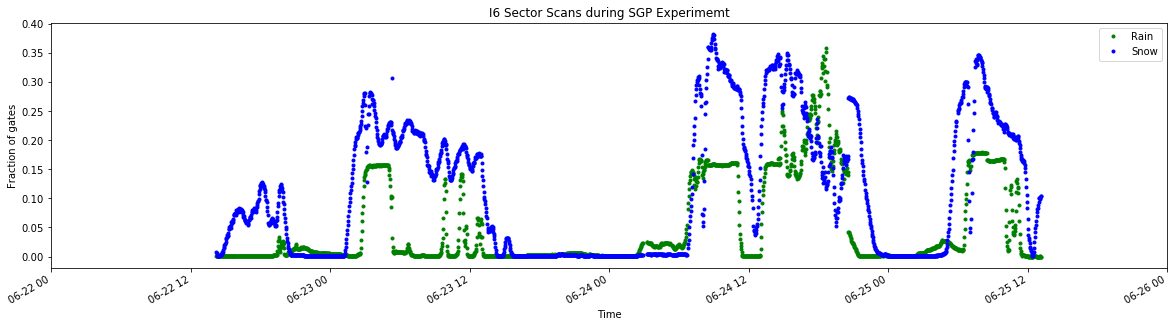

In [63]:
times = np.array([tpl[0] for tpl in d[tuple]])
sme = np.argsort(times)


rain = np.array([tpl[1] for tpl in d[tuple]])
snow = np.array([tpl[2] for tpl in d[tuple]])
my_fig = plt.figure(figsize=[20,5])
plt.plot(times[sme], rain[sme], '.g', label='Rain')
plt.plot(times[sme], snow[sme], '.b', label='Snow')
#plt.plot(times[sme], z40[sme], '-r', label='40dBz')

axme = plt.gca()
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
my_fig.autofmt_xdate()
plt.xlim(['2018-06-22', '2018-06-26'])
plt.ylabel('Fraction of gates')
plt.xlabel('Time')
plt.title('I6 Sector Scans during SGP Experimemt')
plt.legend()
plt.savefig('/home/scollis/cmaci5seczoom.png')

In [80]:
np.unique(experiment)

array(['KDP_SEC     '], dtype='<U12')

In [100]:
snow[30:70]

array([3.12416521e-03, 2.52037340e-03, 3.47637710e-05, 1.82967216e-04,
       2.36942545e-04, 1.03925379e-03, 2.47920578e-04, 2.17365053e-03,
       3.18820374e-03, 1.42006345e-01, 4.84863122e-05, 2.85428857e-04,
       2.08948561e-03, 3.22937136e-03, 2.24958192e-03, 9.81619113e-04,
       2.92747545e-04, 1.75282593e-03, 3.22022300e-04, 8.22437636e-04,
       2.27794184e-04, 2.75365660e-04, 1.14263026e-03, 3.69685260e-03,
       5.12308205e-04, 2.99700300e-03, 2.84514021e-04, 7.39187552e-04,
       9.11176735e-04, 1.26887764e-03, 2.44535684e-03, 5.43412631e-04,
       1.67415003e-04, 1.57999510e-01, 1.37408379e-03, 1.03010543e-03,
       3.09580529e-03, 2.58898611e-04, 9.95643551e-02, 3.65934432e-05])

In [122]:
#array = np.array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0])
thresha = np.arange(0.001, 0.1, .001) 
npt = []
for thresh in thresha:
    snow_ord = snow[sme]
    idx_matching_1 = np.where(snow_ord > thresh)[0]
    consecutive = np.split(idx_matching_1, np.where(np.diff(idx_matching_1) != 1)[0] + 1)
    npt.append(len(consecutive))
    #print(thresh, len(consecutive))


Text(0, 0.5, 'Number of identified Epochs')

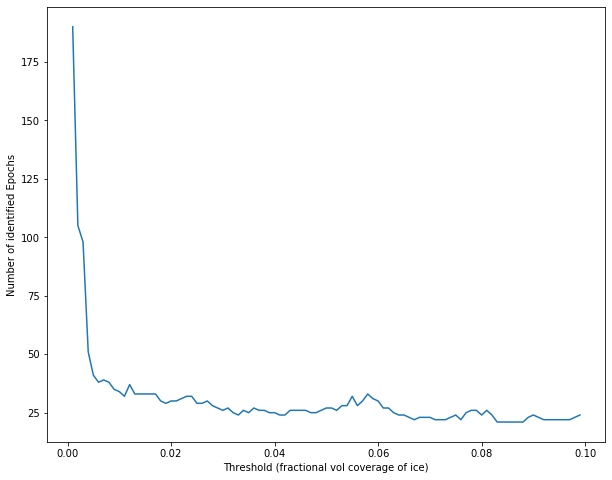

In [124]:
figg = plt.figure(figsize=[10,8])
plt.plot(thresha, npt)
plt.xlabel('Threshold (fractional vol coverage of ice)')
plt.ylabel('Number of identified Epochs')

In [142]:
idx_matching_1 = np.where(snow_ord > 0.043)[0]
consecutive = np.split(idx_matching_1, np.where(np.diff(idx_matching_1) != 1)[0] + 1)
ordered_times = times[sme]
start_ends = []
for region in consecutive:
    start_ends.append((ordered_times[region[0]], ordered_times[region[-1]]))


In [167]:
min_gap = timedelta(hours=3)
glued_start_ends = []
skip_next = False
for i in range(len(start_ends)-1):
    if not skip_next:
        gap = start_ends[i+1][0] - start_ends[i][1]
        print(gap)
        print(gap < min_gap)
        if gap < min_gap:
            print('Gluing!')
            glued_start_ends.append((start_ends[i][0], start_ends[i+1][1]))
            skip_next = True
    else:
        print('reset')
        skip_next = False
        

7:35:59.548000
False
0:04:00.385000
True
Gluing!
reset
3 days, 15:40:00.153000
False
6 days, 6:30:00.412000
False
7:40:00.810000
False
2 days, 6:25:59.825000
False
0:16:00.202000
True
Gluing!
reset
3:25:59.418000
False
2:10:00.300000
True
Gluing!
reset
5:16:00.270000
False
0:03:59.588000
True
Gluing!
reset
0:09:59.666000
True
Gluing!
reset
0:05:59.671000
True
Gluing!
reset
11 days, 8:06:00.115000
False
9 days, 12:08:00.508000
False
18:48:00.121000
False
1:47:59.265000
True
Gluing!
reset
7:19:59.253000
False


In [168]:
glued_start_ends

[(datetime.datetime(2018, 5, 25, 8, 24, 13, 255000),
  datetime.datetime(2018, 5, 25, 14, 18, 13, 738000)),
 (datetime.datetime(2018, 6, 7, 9, 16, 13, 232000),
  datetime.datetime(2018, 6, 7, 20, 54, 13, 720000)),
 (datetime.datetime(2018, 6, 8, 14, 52, 12, 902000),
  datetime.datetime(2018, 6, 8, 20, 10, 13, 103000)),
 (datetime.datetime(2018, 6, 23, 1, 28, 8, 871000),
  datetime.datetime(2018, 6, 23, 14, 0, 8, 366000)),
 (datetime.datetime(2018, 6, 24, 6, 54, 9, 25000),
  datetime.datetime(2018, 6, 24, 22, 34, 8, 644000)),
 (datetime.datetime(2018, 6, 25, 5, 12, 8, 267000),
  datetime.datetime(2018, 6, 25, 12, 2, 8, 284000)),
 (datetime.datetime(2018, 7, 17, 10, 18, 8, 491000),
  datetime.datetime(2018, 7, 17, 17, 32, 8, 727000))]

In [175]:
for i in range(len(glued_start_ends)):
    print('Epoch Number {} '.format(i), glued_start_ends[i][0].strftime('%Y-%m-%d %H:%M:%S'))
    print('Duration ',glued_start_ends[i][1] - glued_start_ends[i][0])

Epoch Number 0  2018-05-25 08:24:13
Duration  5:54:00.483000
Epoch Number 1  2018-06-07 09:16:13
Duration  11:38:00.488000
Epoch Number 2  2018-06-08 14:52:12
Duration  5:18:00.201000
Epoch Number 3  2018-06-23 01:28:08
Duration  12:31:59.495000
Epoch Number 4  2018-06-24 06:54:09
Duration  15:39:59.619000
Epoch Number 5  2018-06-25 05:12:08
Duration  6:50:00.017000
Epoch Number 6  2018-07-17 10:18:08
Duration  7:14:00.236000


In [170]:
min_gap = timedelta(hours=3)
rglued_start_ends = []
skip_next = False
for i in range(len(glued_start_ends)-1):
    if not skip_next:
        gap = glued_start_ends[i+1][0] - glued_start_ends[i][1]
        print(gap)
        print(gap < min_gap)
        if gap < min_gap:
            print('Gluing!')
            rglued_start_ends.append((glued_start_ends[i][0], glued_start_ends[i+1][1]))
            skip_next = True
    else:
        print('reset')
        skip_next = False
        

12 days, 18:57:59.494000
False
17:57:59.182000
False
14 days, 5:17:55.768000
False
16:54:00.659000
False
6:37:59.623000
False
21 days, 22:16:00.207000
False


In [174]:
for epn in range(len(glued_start_ends)):
    my_fig = plt.figure(figsize=[20,5])
    plt.plot(times[sme], rain[sme], '.g', label='Rain')
    plt.plot(times[sme], snow[sme], '.b', label='Snow')
    #plt.plot(times[sme], z40[sme], '-r', label='40dBz')

    axme = plt.gca()
    #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
    my_fig.autofmt_xdate()
    plt.xlim([glued_start_ends[epn][0], glued_start_ends[epn][1]])
    plt.ylabel('Fraction of gates')
    plt.xlabel('Time')
    plt.title('I6 Sector Scans during SGP Experimemt Epoch {}'.format(epn))
    plt.legend()
    plt.savefig('/home/scollis/cmaci5seczoom_epoch{}.png'.format(epn))
    plt.close(my_fig)

In [126]:
consecutive stime.strftime('.%Y%m%d.%H%M%S') print("Fraction of: Gates over 0 dBz: {}, Gates over 10 dBz: {}, Gates over 40 dBz: {}".format(z0, z10, z40 ))

[array([195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
        208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
        221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
        234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
        247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
        260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
        273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
        286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
        299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,
        312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324,
        325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337,
        338, 339, 340, 341]),
 array([568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580,
        581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593,
        594, 595, 596

In [81]:
#radar.info()

In [56]:
radar.metadata['sigmet_task_name']

'KDP_SEC     '

In [85]:
print(times[(np.where(rain == rain.max()))[0]])

[datetime.datetime(2018, 6, 24, 18, 38, 9, 50000)]


In [88]:
inf = '/lustre/or-hydra/cades-arm/proj-shared/scanning_collab/processed/sec/2018/0624/sgpxsaprsecI5.20180624.183809.nc'


In [89]:
radar = pyart.io.read(inf)

In [93]:
sweep = 0
rlat = radar.latitude['data'][0]
rlon = radar.longitude['data'][0]


#Get the date at the start of collection
index_at_start = radar.sweep_start_ray_index['data'][sweep]
time_at_start_of_radar = pyart.io.cfradial.netCDF4.num2date(radar.time['data'][index_at_start], 
                                  radar.time['units'])

#make a nice time stamp
pacific = pytz.timezone('US/Central')
local_time = pacific.fromutc(time_at_start_of_radar)
fancy_date_string = '%.1f' % radar.fixed_angle['data'][sweep] + ' Degree sweep ' +local_time.strftime('%A %B %d at %I:%M %p GMT%Z')
print(fancy_date_string)

7.5 Degree sweep Sunday June 24 at 01:38 PM GMTCDT


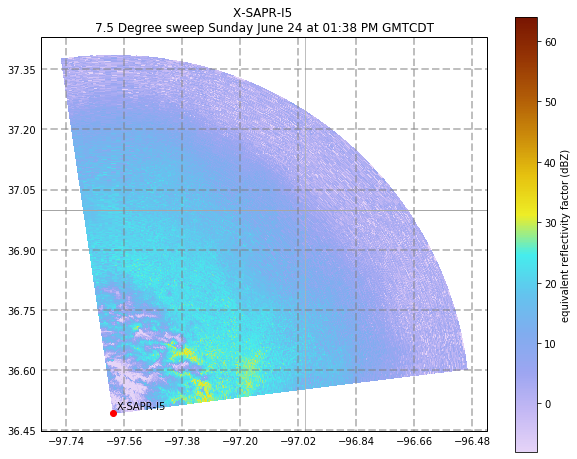

In [96]:
#Set up our figure
fig = plt.figure(figsize = [10,8])

#create a Cartopy Py-ART display object
display = pyart.graph.RadarMapDisplay(radar)

#get center of the display for the projection
lat_0 = rlat
lon_0 = rlon*-1

# Main difference from Basemap! 
#Cartopy forces you to select a projection first!
projection = cartopy.crs.Mercator(
                central_longitude=lon_0,
                min_latitude=rlat-5., max_latitude=rlat+5.)

title = 'X-SAPR-I5 \n' + fancy_date_string

#plot a PPI! add coastline at 10m resolution
display.plot_ppi_map(
    'reflectivity', sweep, colorbar_flag=True,
    title=title,
    projection=projection, resolution='10m', 
    cmap=pyart.graph.cm.LangRainbow12,
    vmin=-8, vmax=64)
#min_lon=-65.1, min_lat=-32.4, max_lon=-64.6, max_lat=-32.1 
# Mark the radar
display.plot_point(lon_0*-1, lat_0, label_text='X-SAPR-I5')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False